# Programming task

**The task should be completed with the current values of the hyperparameters. For verification, below you will see the answers that should be obtained. After all the answers match, you can use the resulting notebook to complete your individual task.**

Set model hyperparameters

In [15]:
epsilon = 0.1 # Epsilon parameter which is used in epsilon-greedy strategy
gamma = 0.8 # Discount coefficient gamma
random_seed = 3 #Random seed
time_delay = 1 # Time delay when rendering the game process after training (seconds)
lr_rate = 0.9 #Learning rate alpha

We import the libraries, create our own 6x6 environment. S denotes the starting point. F - ice is safe (frozen), H - hole, G - goal. The parameter `is_slippery = False` is responsible for slipping. That is, if the agent chose the action to go right, then it will move to the corresponding state. In the general case, due to the “slipping”, one may find itself in a different state. We also copied from the GYM library and slightly modified the function `` generate_random_map ``, in order to generate arbitrary maps based on `` random_seed ``.

In [26]:
import gym
import numpy as np
import time
from IPython.display import clear_output


def generate_random_map(size, p, sd):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False
    np.random.seed(sd)

    # DFS to check that it's a valid path.
    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0,0))
        while frontier:
            r, c = frontier.pop()
            if not (r,c) in discovered:
                discovered.add((r,c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] not in '#H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]

# Map generation
random_map = generate_random_map(size=6, p=0.8, sd = random_seed) #Create our map
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=False) #Initialize environment
print("Your map")
env.render() #Render the map

Your map

SFFFHH
FFFFFF
FFFFFF
FFFFFF
FFFFFH
HFHHFG


Functions for selecting an action and updating an action value table. The line *** is used to check responses in openedx. Outside of the academic problem, it is better to use the original method of the `environment` class, that is:

`action = env.action_space.sample ()`

# Task 1
Complete the function `` learn () ``, so that as a result of its call, the value of the current action is updated according to the Q-learning algorithm

In [17]:
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0,env.action_space.n) #***
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

def learn(state, state2, reward, action, done):
        #Q-learning
    if done:
      Q[state, action] = Q[state, action] + lr_rate * (reward - Q[state, action])
    else:
      Q[state, action] = Q[state, action] + lr_rate * (reward + gamma * np.max(Q[state2, :]) - Q[state, action])

# Task 2
Complete the following code so that as a result of training the model you could find out the number of wins and the number of the game (`game`), on which the agent won the fifth victory in a row for the first time.

Let's explain what the function ```env.step(action)``` returns 

```state2``` --  next state

```reward``` -- reward

```done``` -- inidcator of the end of the game. True in case of victory or fall into the hole. False in other cases.




In [18]:
from tqdm import tqdm
# Inititalization
wins_arr = [] #delete
np.random.seed(random_seed)
total_games = 10000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
min_game = 0 #delete
#Main cycle
for game in tqdm(range(total_games)):
    state = env.reset()
    t = 0
    while t < max_steps:
        #delete
        if game > 5 and wins_arr[game-5] == 1 and wins_arr[game-4] == 1 and    wins_arr[game-3] == 1 and wins_arr[game-2] == 1 and wins_arr[game-1] == 1 and min_game == 0:
          min_game = game

        t += 1

        action = choose_action(state)

        state2, reward, done, info = env.step(action)

        if t == max_steps:
          done = True  

        learn(state, state2, reward, action, done)

        state = state2

        if done and reward == 1:
          wins_arr.append(1) #record if won
          break
        if done:
          wins_arr.append(0) #record if lost
          break


100%|██████████| 10000/10000 [00:06<00:00, 1534.40it/s]


Output answers with the given parameters

In [19]:
print("The number of victories in a series of 10,000 games: ", np.sum(wins_arr))
print("Five wins in a row were first won in the game ", min_game) #Your code here)


The number of victories in a series of 10,000 games:  9116
Five wins in a row were first won in the game  32


The following results should be obtained.


*  The number of victories in a series of 10,000 games:  7914
*  Five wins in a row were first won in the game  885




Let's perform one game to track the actions of the agent. At the same time, we will consider the model fully trained, that is, actions are selected according to the greedy strategy, the values of the actions in the table are not updated.

In [20]:
import time
#Greedy action selection
def choose_action_one_game(state):
    action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

states=[]#Array to save agent states during the game
t = 0
state = env.reset()
wn = 0
while(t<100):
  env.render()
  time.sleep(time_delay)
  clear_output(wait=True)
  action = choose_action_one_game(state)  
  state2, reward, done, info = env.step(action)  
  states.append(state)
  state = state2
  t += 1
  if done and reward == 1:
    wn=1
  if done:
    break
if wn == 1:
  print("!!!WIN!!!")

!!!WIN!!!


Route map

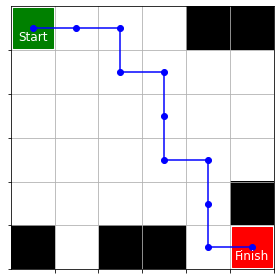

In [21]:
import matplotlib.pyplot as plt

def make_maze_pic(maze):
  maze_pic=[]
  for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
      if maze[i][j] == 'S':
        row.append(0)
      if maze[i][j] == 'F':
        row.append(0)
      if maze[i][j] == 'H':
        row.append(1)
      if maze[i][j] == 'G':
        row.append(0)
    maze_pic.append(row)
  maze_pic = np.array(maze_pic)
  return maze_pic
  

#Make maze fit to plot
maze_pic = make_maze_pic(random_map)
nrows, ncols = maze_pic.shape

#Arrays of picture elements
rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
if wn == 1:
  rw = np.append(rw, [nrows-1])
  cl = np.append(cl,[ncols-1])

#Picture plotting
fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")

# Task 3

Duplicate the resulting notebook and use the SARSA algorithm instead of the Q-learning algorithm. Please note that the task requires changing the number of games. That is, `total_games = 40000`. Blocks should be run sequentially from the very beginning (due to `random_seed`). We draw your attention to the fact that when changing the algorithm from Q-learning to SARSA, both the learning process and the `learn ()` function should be modified. Note that, the `learn ()` function should have an additional argument (the next action). Below you can find a "sceleton" of code explaining how to modify the algorithm.

In [22]:
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0,env.action_space.n) #***
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

def learn(state, state2, reward, action, action2, done):
        #Q-learning
    if done:
      Q[state, action] = Q[state, action] + lr_rate * (reward - Q[state, action])
    else:
      Q[state, action] = Q[state, action] + lr_rate * (reward + gamma * np.max(Q[state2, action2]) - Q[state, action])

In [23]:
from tqdm import tqdm
np.random.seed(random_seed)
wins_arr = [] #delete
total_games = 40000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
min_game = 0 #delete
#Main cycle
for game in tqdm(range(total_games)):
    state = env.reset()
    t = 0
    action = choose_action(state) #Choice of action at the very beginning of each game
    while t < max_steps:
        #delete
        if game > 5 and wins_arr[game-5] == 1 and wins_arr[game-4] == 1 and    wins_arr[game-3] == 1 and wins_arr[game-2] == 1 and wins_arr[game-1] == 1 and min_game == 0:
          min_game = game
              
        t += 1

        state2, reward, done, info = env.step(action)

        action2 =  choose_action(state2) #choice of action for the next step of the game, as well as for updating the value of the current action

        if t == max_steps:
          done = True  

        learn(state, state2, reward, action, action2, done) # action2 is also passed to the training function

        state = state2

        action = action2

        if done and reward == 1:
          wins_arr.append(1) #record if won
          break
        if done:
          wins_arr.append(0) #record if lost
          break

100%|██████████| 40000/40000 [00:42<00:00, 930.52it/s] 


In [24]:
print("The number of victories in a series of 10,000 games: ", np.sum(wins_arr))
print("Five wins in a row were first won in the game ", min_game) #Your code here)


The number of victories in a series of 10,000 games:  36020
Five wins in a row were first won in the game  91


As a result of training, the following answers should be obtained:

*   The number of victories in a series of 40,000 games:  32328
*   Five wins in a row were first won in the game  894

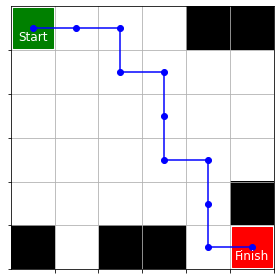

In [25]:
import matplotlib.pyplot as plt

def make_maze_pic(maze):
  maze_pic=[]
  for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
      if maze[i][j] == 'S':
        row.append(0)
      if maze[i][j] == 'F':
        row.append(0)
      if maze[i][j] == 'H':
        row.append(1)
      if maze[i][j] == 'G':
        row.append(0)
    maze_pic.append(row)
  maze_pic = np.array(maze_pic)
  return maze_pic


#Make maze fit to plot
maze_pic = make_maze_pic(random_map)
nrows, ncols = maze_pic.shape

#Arrays of picture elements
rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
if wn == 1:
  rw = np.append(rw, [nrows-1])
  cl = np.append(cl,[ncols-1])

#Picture plotting
fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")